In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *
from utils import *
from graph_score import *

In [3]:
windowSize = 43200

In [7]:
def load_data(path):
    x = numpy.load(path)['x']

    x = x[x['course'] != Inf]
    x = x[x['speed'] != Inf]

    x = x[lexsort((x['timestamp'], x['mmsi']))]
    return x

In [5]:
def old_score(x, windowSize):
    # Average with magic *2 scaling
    score = (x['measure_coursestddev_%s' % windowSize] + x['measure_speedstddev_%s' % windowSize] + x['measure_speedavg_%s' % windowSize]) * 2.0 / 3.0

    # Clamp to ]0, 1[
    score = where(score < 0.0, 0.0, where(score > 1.0, 1.0, score))

    x['measure_new_score_%s' % windowSize] = score
    
def new_score(x, windowSize):
    score = (polynomial(x['measure_speedavg_%s' % windowSize], -4.93476416e+02, -6.89408463e+00, 1.49592824e+01, -9.39170147e+00) +
             polynomial(x['measure_speedstddev_%s' % windowSize], 1.50645878e+02, -1.52138106e+00, -1.08817054e+00, -2.09136308e-01) +
             polynomial(x['measure_coursestddev_%s' % windowSize], 3.43542952e+02, -1.12446817e+00, -1.19029177e+00, -2.85164010e-01))

    # Clamp to ]0, 1[
    score = where(score < -2., -2., where(score > 2.0, 2.0, score))

    x["measure_new_score_%s" % windowSize] = score

In [8]:
x = load_data("datasets/kristina_longliner.measures.npz")

Squared numerical error: 0.130604533113
Error (overlap): 23.8615680617%
False positives given cutoff at 0.5: 21.2452712702%


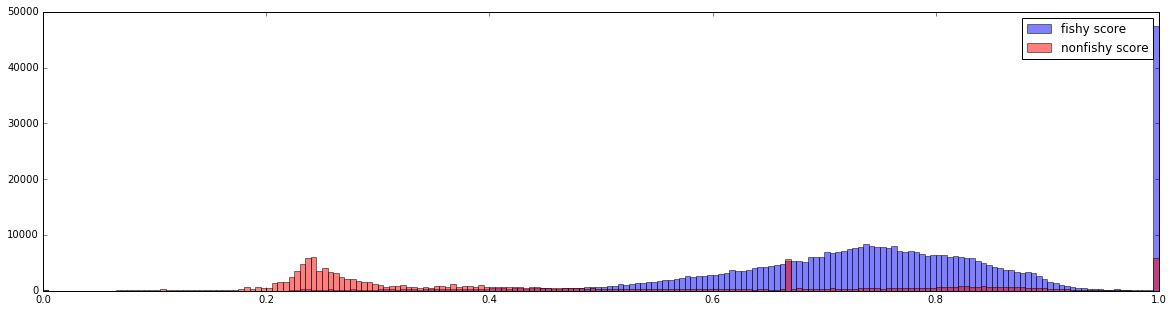

In [9]:
old_score(x, windowSize)
graph_score(x, windowSize)

Squared numerical error: 2.76182973569
Error (overlap): 33.0531883021%
False positives given cutoff at 0.5: 39.127045986%


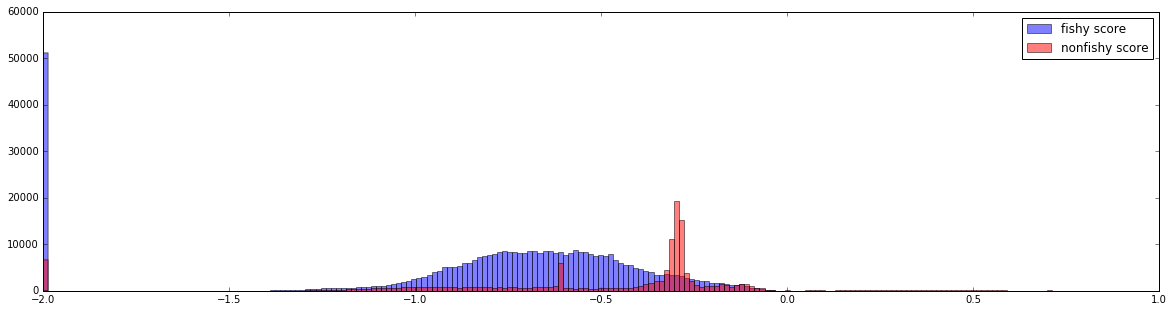

In [10]:
new_score(x, windowSize)
graph_score(x, windowSize)

In [11]:
x = load_data("datasets/kristina_ps.measures.npz")

Squared numerical error: 0.418612786217
Error (overlap): 9.47813595991%
False positives given cutoff at 0.5: 13.1786239582%


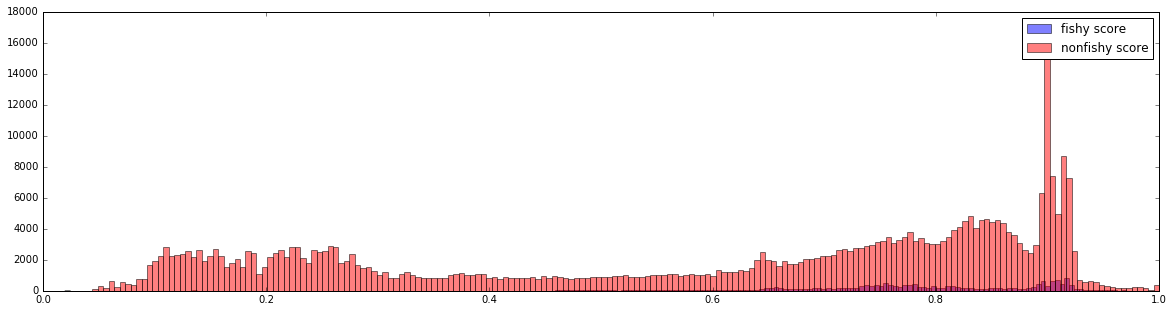

In [12]:
old_score(x, windowSize)
graph_score(x, windowSize)